<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex06/Alexander_Valle/Alexander_Valle_IA025_Aula_6__Exerc%C3%ADcio__Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento de uma CNN no CIFAR 10

In [ ]:
nome ='Rolan Alexander Valle Rey Sánchez'

print(f'Meu nome é {nome}')

Meu nome é Rolan Alexander Valle Rey Sánchez


Este exercicío consiste em implementar e treinar no CIFAR-10 vários blocos de uma Resnet seguido de uma camada linear de classificação.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

## Fixando as seeds

In [ ]:
random.seed(123)
np.random.seed(123)
torch.manual_seed(123)

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 50

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Download do CIFAR-10

In [ ]:
!mkdir ./data

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Criação do dataloader

In [ ]:
train_size = 40000
val_size = 10000
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

In [ ]:
batch_size = 50

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Número de minibatches de trenamento:', len(train_dataloader))
print('Número de minibatches de validação:', len(val_dataloader))
print('Número de minibatches de teste:', len(test_dataloader))

x_train, y_train = next(iter(train_dataloader))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 800
Número de minibatches de validação: 200
Número de minibatches de teste: 200

Dimensões dos dados de um minibatch: torch.Size([50, 3, 32, 32])
Valores mínimo e máximo dos pixels:  tensor(-1.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


## Implementando o Bloco Básico da Resnet

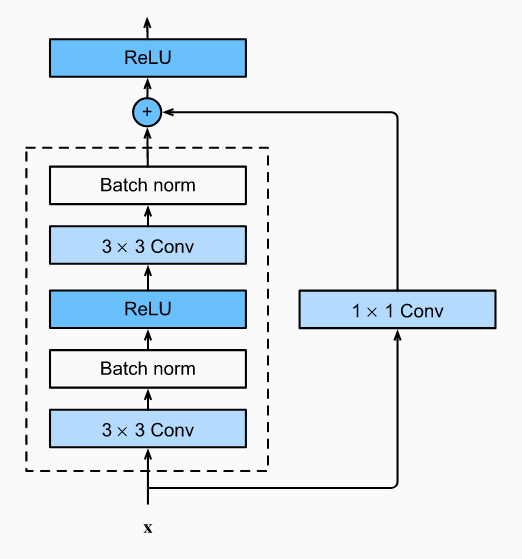

## Compare se sua implementação está igual à do pytorch usando um exemplo aleatório

In [ ]:
from torch import nn
from torch import Tensor

class MyBasicBlock(nn.Module):
    def __init__(self,inplanes: int,planes: int,stride: int = 1,) -> None:
        super().__init__()
        # Escreva seu código aqui.
        self.downsample = nn.Conv2d(inplanes, planes, kernel_size=1, stride=stride, padding=0,  bias=False, dilation=1)
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, padding=1, stride=stride, bias=False, dilation=1)
        self.conv2 = nn.Conv2d(planes, planes,kernel_size=3, padding=1, stride=1, bias=False, dilation=1)    
        self.bn1 = nn.BatchNorm2d(planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.relu=nn.ReLU(inplace=True)        

    def forward(self, x: Tensor) -> Tensor:
        # Escreva seu código aqui.
        y=self.relu(self.bn1(self.conv1(x)))
        y=self.bn2(self.conv2(y))
        Idt=self.downsample(x)# identity
        out=self.relu(y+Idt)
        return out

In [ ]:
import torchvision
height_in = 5
width_in = 5
inplanes = 2
planes = 3
stride = 2

x = torch.rand(1, inplanes, height_in, width_in)

block = MyBasicBlock(inplanes=inplanes, planes=planes, stride=stride)

downsample = nn.Conv2d(inplanes, planes, kernel_size=1, stride=stride, padding=0, groups=1, bias=False, dilation=1)

block_pt = torchvision.models.resnet.BasicBlock(inplanes=inplanes, planes=planes, stride=stride, downsample=downsample)

# Usa os mesmos pesos para minha implementação e a do pytorch
block.load_state_dict(block_pt.state_dict())

out = block(x)
target_out = block_pt(x)

print(f'out:\n{out}')
print(f'target_out:\n{target_out}')

assert torch.allclose(out, target_out, atol=1e-6)

out:
tensor([[[[0.2084, 0.0000, 0.1053],
          [1.2176, 1.7145, 0.0000],
          [2.1509, 0.0000, 0.0000]],

         [[0.0000, 1.4478, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.6579, 0.5231, 0.0000]],

         [[0.0000, 0.8983, 1.1205],
          [0.0000, 0.0000, 0.0225],
          [0.0000, 0.8017, 0.5681]]]], grad_fn=<ReluBackward0>)
target_out:
tensor([[[[0.2084, 0.0000, 0.1053],
          [1.2176, 1.7145, 0.0000],
          [2.1509, 0.0000, 0.0000]],

         [[0.0000, 1.4478, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.6579, 0.5231, 0.0000]],

         [[0.0000, 0.8983, 1.1205],
          [0.0000, 0.0000, 0.0225],
          [0.0000, 0.8017, 0.5681]]]], grad_fn=<ReluBackward0>)


## Modelo

Implemente um modelo de classificação que será treinado no CIFAR-10.

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()
        # Escreva seu código aqui.
        #inspiration from https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
        self.b1= MyBasicBlock(inplanes=3, planes=32, stride=1)
        self.b2= MyBasicBlock(inplanes=32, planes=64, stride=1)
        self.b3= MyBasicBlock(inplanes=64, planes=64, stride=1)
        self.b4= MyBasicBlock(inplanes=64, planes=128, stride=1)
        self.b5= MyBasicBlock(inplanes=128, planes=256, stride=1)
        self.model = nn.Sequential(self.b1,self.b2,self.b3,self.b4,self.b5,
                                  nn.AdaptiveAvgPool2d(1),
                                  nn.Flatten(), nn.Linear(256, 10))        

    def forward(self, x):
        # Escreva seu código aqui.
        out=self.model(x)
        return out

## Treinamento

### Definição dos hiperparâmetros

In [ ]:
n_epochs = 20
lr = 0.01

### Detectando a GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def evaluation(model, loader): #
    # Escreva seu código aqui.
  def getacuracy(ytrue, ypredicted):
    correct = 0
    for k , yt in enumerate(ytrue):
      #print('ytrue[k]=',ytrue[k],'   ypredicted[k]=',ypredicted[k])
      if ytrue[k]==ypredicted[k]: correct +=1
    total=float(k+1)
    return correct/total

  model.eval()
  # inspiration from https://github.com/rasbt/stat453-deep-learning-ss21/blob/main/L14/2-resnet-example.ipynb
  with torch.no_grad(): # line code from patrick_ferreira
    # https://discuss.pytorch.org/t/where-should-i-use-with-torch-no-grad/53277
    yt,yp=[],[]
    accuracy=[]
    for x_t, y_t in tqdm(loader,total=len(loader), desc='evaluation'):#
        x_t = x_t.to(device)
        yt.append(y_t.to(device))
        # y predict da rede
        y_p =  torch.argmax(model(x_t), dim=1)
        yp.append(y_p)
        accuracy.append(getacuracy(y_t, y_p))

    mean_accuracy=np.array(accuracy).mean() 
    print(f'Accuracy: {mean_accuracy}')

In [ ]:
def othercompute_accuracy(model, data_loader):
  # from https://discuss.pytorch.org/t/model-eval-gives-different-results-every-time/34865
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):

        features = features.to(device)
        targets = targets.to(device)

        logits = model.eval()(features)
        y_pred = logits.max(1)[1]

        num_examples += targets.size(0)
        correct_pred += (y_pred == targets).sum()
    return correct_pred.float() / num_examples #* 100

### Laço de treinamento

In [ ]:
from tqdm import tqdm


model = Net()

model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

epochs = []
loss_history = []
loss_epoch_end = []
total_trained_samples = 0

# Primeira avaliação com pesos aleatórios
evaluation(model=model, loader=val_dataloader)

for i in range(n_epochs):
    model.train()
    for x_train, y_train in tqdm(train_dataloader, total=len(train_dataloader), desc='Training'):
        x_train = x_train.to(device)
        y_train = y_train.to(device)

        # predict da rede
        outputs = model(x_train)

        # calcula a perda
        loss = criterion(outputs, y_train)
        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / len(train_dataset))
        loss_history.append(loss.item())

    loss_epoch_end.append(loss.item())
    print(f'Epoch: {i:d}/{n_epochs - 1:d} Loss: {loss.item()}')

    # Chama a função de validação no final de cada época
    evaluation(model=model, loader=val_dataloader)

evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]


Accuracy: 0.09950000000000003


Training: 100%|██████████| 800/800 [04:50<00:00,  2.76it/s]


Epoch: 0/19 Loss: 1.321202278137207


evaluation: 100%|██████████| 200/200 [00:28<00:00,  7.14it/s]


Accuracy: 0.4163


Training: 100%|██████████| 800/800 [04:50<00:00,  2.76it/s]


Epoch: 1/19 Loss: 1.142759084701538


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.31it/s]


Accuracy: 0.4878


Training: 100%|██████████| 800/800 [04:49<00:00,  2.76it/s]


Epoch: 2/19 Loss: 1.162164330482483


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]


Accuracy: 0.6243


Training: 100%|██████████| 800/800 [04:48<00:00,  2.77it/s]


Epoch: 3/19 Loss: 0.9705858826637268


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.36it/s]


Accuracy: 0.6539


Training: 100%|██████████| 800/800 [04:49<00:00,  2.76it/s]


Epoch: 4/19 Loss: 0.9260074496269226


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.31it/s]


Accuracy: 0.5937


Training: 100%|██████████| 800/800 [04:49<00:00,  2.76it/s]


Epoch: 5/19 Loss: 1.0129704475402832


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.38it/s]


Accuracy: 0.6324


Training: 100%|██████████| 800/800 [04:48<00:00,  2.78it/s]


Epoch: 6/19 Loss: 0.8181373476982117


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.33it/s]


Accuracy: 0.6126999999999999


Training: 100%|██████████| 800/800 [04:50<00:00,  2.76it/s]


Epoch: 7/19 Loss: 0.5231997966766357


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]


Accuracy: 0.7339


Training: 100%|██████████| 800/800 [04:50<00:00,  2.75it/s]


Epoch: 8/19 Loss: 0.7988389730453491


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.35it/s]


Accuracy: 0.6394000000000001


Training: 100%|██████████| 800/800 [04:49<00:00,  2.76it/s]


Epoch: 9/19 Loss: 0.43483638763427734


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.37it/s]


Accuracy: 0.6273


Training: 100%|██████████| 800/800 [04:48<00:00,  2.77it/s]


Epoch: 10/19 Loss: 0.7530701160430908


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.33it/s]


Accuracy: 0.7301000000000001


Training: 100%|██████████| 800/800 [04:48<00:00,  2.77it/s]


Epoch: 11/19 Loss: 0.36489495635032654


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]


Accuracy: 0.7012999999999999


Training: 100%|██████████| 800/800 [04:48<00:00,  2.77it/s]


Epoch: 12/19 Loss: 0.47395050525665283


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.37it/s]


Accuracy: 0.7980000000000002


Training: 100%|██████████| 800/800 [04:48<00:00,  2.77it/s]


Epoch: 13/19 Loss: 0.586446225643158


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]


Accuracy: 0.6816


Training: 100%|██████████| 800/800 [04:49<00:00,  2.77it/s]


Epoch: 14/19 Loss: 0.38512638211250305


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.33it/s]


Accuracy: 0.7358


Training: 100%|██████████| 800/800 [04:49<00:00,  2.76it/s]


Epoch: 15/19 Loss: 0.42191997170448303


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]


Accuracy: 0.7022999999999999


Training: 100%|██████████| 800/800 [04:48<00:00,  2.78it/s]


Epoch: 16/19 Loss: 0.2900514006614685


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.34it/s]


Accuracy: 0.7454999999999999


Training: 100%|██████████| 800/800 [04:47<00:00,  2.78it/s]


Epoch: 17/19 Loss: 0.21785345673561096


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.35it/s]


Accuracy: 0.7679


Training: 100%|██████████| 800/800 [04:48<00:00,  2.78it/s]


Epoch: 18/19 Loss: 0.4655991792678833


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.34it/s]


Accuracy: 0.7433999999999998


Training: 100%|██████████| 800/800 [04:48<00:00,  2.78it/s]


Epoch: 19/19 Loss: 0.3710901737213135


evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.38it/s]

Accuracy: 0.7445


### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

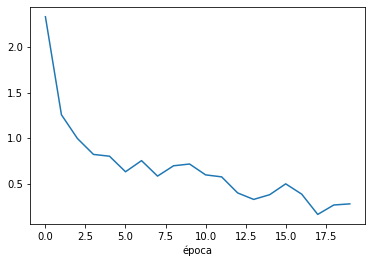

In [ ]:
n_batches_train = len(train_dataloader)
plt.plot(epochs[::n_batches_train], loss_history[::n_batches_train])
plt.xlabel('época')

## Avaliação final no dataset de testes

In [ ]:
evaluation(model=model, loader=test_dataloader)

evaluation: 100%|██████████| 200/200 [00:27<00:00,  7.39it/s]

Accuracy: 0.7477000000000001


# Bonus Opcional

## Implementando o Dropout

In [ ]:
class MyDropout(torch.nn.Module):
  def __init__(self, p: float):
    # Escreva seu código aqui.
    #p : probability  dropout
    super(MyDropout, self).__init__()
    #https://discuss.pytorch.org/t/implementing-dropout/128389
    if p < 0 or p > 1:
      raise ValueError("dropout probability has to be between 0 and 1, " "but got {}".format(p))
    self.p = p        

  def forward(self, X: Tensor, training: bool):
    # Escreva seu código aqui.
    if 0<self.p<1:
      #print('0<prob<1')
      mask=torch.where(torch.rand(X.shape) >= self.p,  1,  0).float()
      return X*mask/(1.0-self.p)  #rescaling by dividing with the probalilty of survivors( 1.0-p)
    if self.p==0:
      return X # the same
    elif self.p==1:
      return torch.zeros(X.shape) # all zeros

In [ ]:
class OtherDropout(nn.Module):
    def __init__(self, p: float = 0.5):
        super(OtherDropout, self).__init__()
        #https://discuss.pytorch.org/t/implementing-dropout/128389
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, " "but got {}".format(p))
        self.p = p

    def forward(self, X):
        if self.training:
            binomial = torch.distributions.binomial.Binomial(probs=1-self.p)
            return X * binomial.sample(X.size()) * (1.0/(1-self.p))
        return X

## Mostre que sua implementação traz resultados semelhantes à implementação do pytorch

In [ ]:
import math

p = 0.5
dropout = MyDropout(p=p)

x = torch.rand(16, 3, 32, 32)

out = dropout(x, training=True)
out_pt = torch.nn.functional.dropout(x, p=p, training=True)

mean_zeros = (out == 0).sum() / out.numel()
mean_zeros_pt = (out_pt == 0).sum() / out_pt.numel()

print(f'mean zeros: {mean_zeros}')
print(f'mean zeros pytorch: {mean_zeros_pt}')

assert math.isclose(mean_zeros, mean_zeros_pt, abs_tol=1e-2)

out = dropout(x, training=False)
target_out = torch.nn.functional.dropout(x, p=p, training=False, inplace=False)
#assert torch.allclose(out, target_out, atol=1e-2)
assert torch.allclose(out.mean(), target_out.mean(), atol=1e-3)

mean zeros: 0.4998575747013092
mean zeros pytorch: 0.5009765625


In [ ]:
def comparinDrops(XX,lp):
  mysd=[]
  sd=[]
  sfd=[]
  for p in lp:
    Xmd=MyDropout(p=p)(XX, training=True)
    Xfd=nn.functional.dropout(XX, p=p, training=True)
    Xd=nn.Dropout(p=p)(XX)
    mysd.append(Xmd.sum().item())
    sd.append(Xd.sum().item())
    sfd.append(Xfd.sum().item())  

  xa=lp
  plt.plot(xa, mysd, 'g-o', label='mydrop')
  plt.plot(xa, sfd, 'r-+', label='nn.functional.dropout')
  plt.plot(xa, sd, 'b-x', label='nn.Dropout')
  # show legend
  plt.legend()
  plt.xlabel('Dropout probability')
  plt.ylabel('sum of Dropout of Tesnsor with 1000 ones')
  # show graph
  return np.array(mysd), np.array(sfd),np.array(sd)  


https://stackoverflow.com/questions/53419474/pytorch-nn-dropout-vs-f-dropout#:~:text=The%20dropout%20module%20nn.,about%20the%20evaluation%20%2F%20prediction%20mode.

In [ ]:
X=torch.ones(4, 5,50)


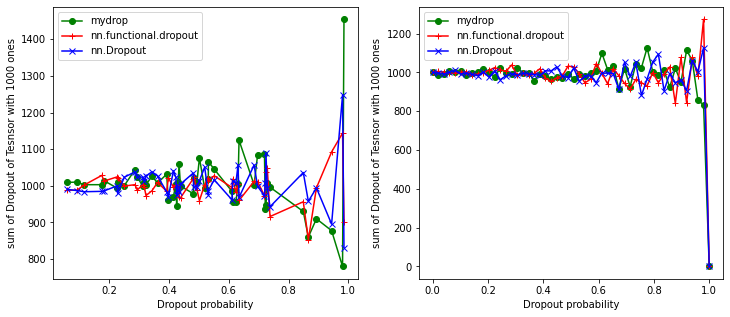

In [ ]:
lprobtest1=np.random.uniform(0,1,50)
lprobtest1.sort()
lprobtest2=np.linspace(0, 1, 50)

# plot with various axes scales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mysd0, sfd0,sd0  = comparinDrops(X,lprobtest1)

plt.subplot(1, 2, 2)
mysd1, sfd1,sd1 = comparinDrops(X,lprobtest2)
plt.show()


## rolling the dices one thousand times

In [ ]:
def comparinDrops2(XX,lp,plot):
  mysd=[]
  sd=[]
  sfd=[]
  for p in lp:
    tmysd=[]
    tsd=[]
    tsfd=[]
    for k in range(1000):
      Xmd=MyDropout(p=p)(XX, training=True)
      Xfd=nn.functional.dropout(XX, p=p, training=True)
      Xd=nn.Dropout(p=p)(XX)
      tmysd.append(Xmd.sum().item())
      tsd.append(Xd.sum().item())
      tsfd.append(Xfd.sum().item())  

    mysd.append(np.array(tmysd).mean())
    sd.append(np.array(tsd).mean())
    sfd.append(np.array(tsfd).mean())      

  xa=lp
  if plot:
    plt.plot(xa, mysd, 'g-o', label='mydrop')
    plt.plot(xa, sfd, 'r-s', label='nn.functional.dropout')
    plt.plot(xa, sd, 'b-d', label='nn.Dropout')
    # show legend
    plt.legend()
    plt.xlabel('Dropout probability')
    plt.ylabel('sum of Dropout of Tesnsor with 1000 ones')
  # show graph
  return np.array(mysd), np.array(sfd),np.array(sd)  


In [ ]:
def comparinDrops3(XX,lp,plot):
  mysd=[]
  sd=[]
  sfd=[]
  for p in lp:
    tmysd=[]
    tsd=[]
    tsfd=[]
    for k in range(1000):
      Xmd=MyDropout(p=p)(XX, training=True)
      Xfd=nn.functional.dropout(XX, p=p, training=True)
      Xd=nn.Dropout(p=p)(XX)      
      tmysd.append((Xmd!=0).sum()) 
      tsd.append((Xd!=0).sum())
      tsfd.append((Xfd!=0).sum())  

    mysd.append(np.array(tmysd).mean())
    sd.append(np.array(tsd).mean())
    sfd.append(np.array(tsfd).mean())      

  xa=lp

  if plot:
    plt.plot(xa, mysd, 'g-o', label='mydrop')
    plt.plot(xa, sfd, 'r-+', label='nn.functional.dropout')
    plt.plot(xa, sd, 'b-x', label='nn.Dropout')
    plt.legend()
    plt.xlabel('Dropout probability')
    plt.ylabel(' number of not zero elements')

  ne=XX.numel()#number of elements  
  # return the probabilty tha the droup thenzo do not have zero elements
  return np.array(mysd)/ne, np.array(sfd)/ne,np.array(sd)/ne  


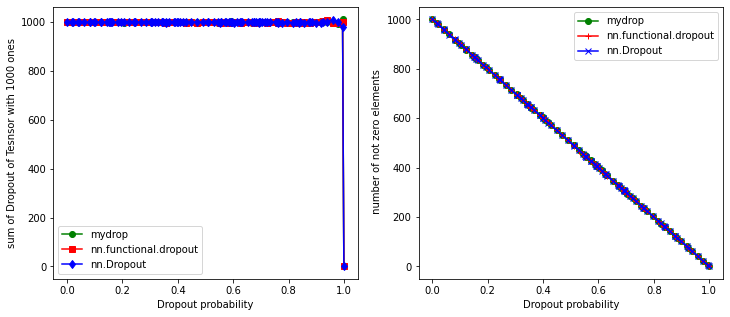

In [ ]:
lprobtest=list(np.random.uniform(0,1,50)) + list(np.linspace(0, 1, 50))
lprobtest.sort()

# plot with various axes scales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mysd2, sfd2,sd2 = comparinDrops2(X,lprobtest,True)

plt.subplot(1, 2, 2)
mysd3, sfd3,sd3  = comparinDrops3(X,lprobtest,True)
plt.show()

In [ ]:
import scipy.stats as stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
correlation1, p_value = stats.pearsonr(mysd2, sfd2)
print(correlation1)
correlation2, p_value = stats.pearsonr(mysd2, sd2)
print(correlation2)

0.9997422884634886
0.9992190194877336


In [ ]:

correlation1, p_value = stats.pearsonr(mysd3*1000, sfd3*1000)
print(correlation1)
correlation2, p_value = stats.pearsonr(mysd3*1000, sd3*1000)
print(correlation2)

0.9999978942771591
0.9999979449697678


In [ ]:
sum(abs(mysd3-sfd3)//0.01)

0.0